## <h2 style="text-align: center; color: #4c4cff;">👨‍💻 About the Author</h2>

**Name**: Arif Miah  

🎓 **Profession**: Machine Learning Engineer  

🔍 I am a passionate **Machine Learning Engineer** with expertise in building real-world solutions using **Machine Learning, Deep Learning, Computer Vision**, and **Data Science**. I love turning data into meaningful insights and solving complex challenges using cutting-edge technologies.  

💻 **Skills**:
- Machine Learning & Deep Learning  
- Natural Language Processing (NLP)  
- Computer Vision & Data Analysis  
- Python Programming  
- Model Deployment  

---

### 🌐 Connect with Me  

📧 **Email**: [arifmiahcse@gmail.com](mailto:arifmiahcse@gmail.com)  

🔗 **LinkedIn**: [LinkedIn Profile](https://www.linkedin.com/in/arif-miah)  

🐱 **GitHub**: [GitHub Profile](https://github.com/Arif-miad)  

📝 **Kaggle**: [Kaggle Profile](https://www.kaggle.com/arifmia)  

---

🚀 Let's collaborate and build something amazing together! If you are working on exciting projects or have challenges to solve, feel free to connect.  

<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Import libraries</h2>

In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import pandas as pd    
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')









<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Load the dataset</h2>

In [2]:
df = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")

<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Explore the dataset</h2>

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.shape

(918, 12)

<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Univaraite analysis</h2>

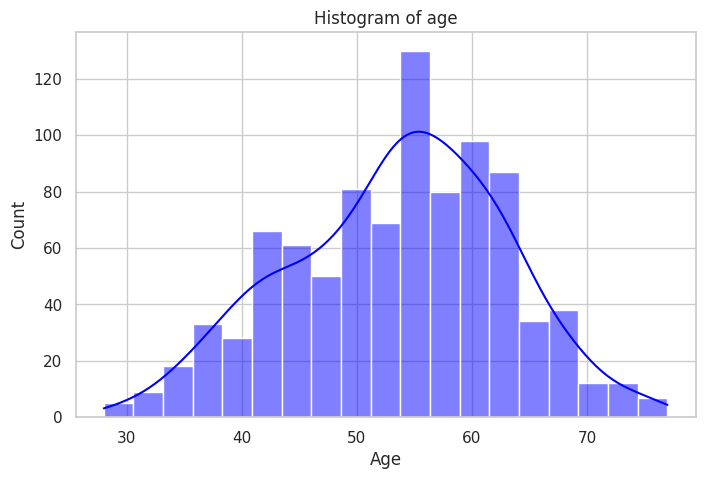

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde=True, color='blue')
plt.title("Histogram of age")
plt.show()

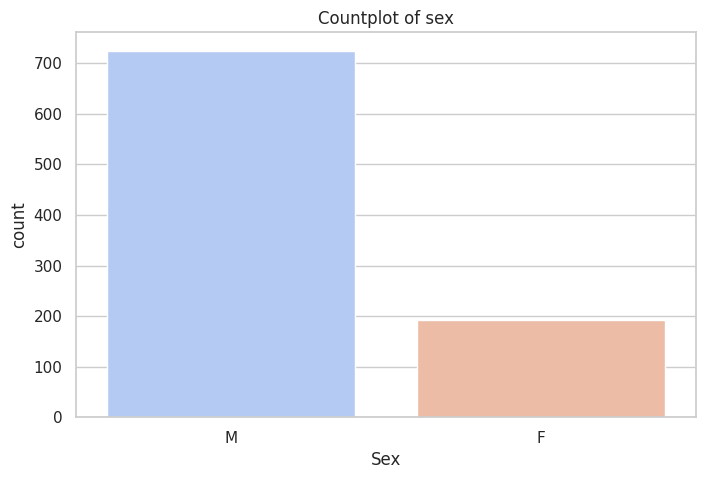

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x='Sex', data=df, palette='coolwarm')
plt.title("Countplot of sex")
plt.show()

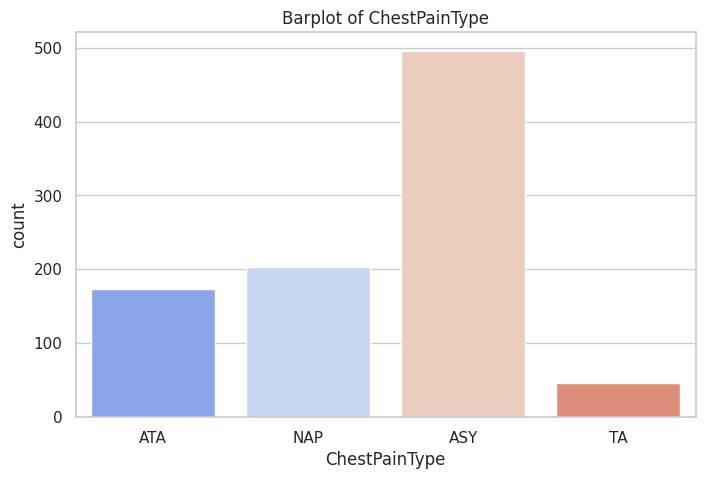

In [10]:
# 3. Barplot for ChestPainType
plt.figure(figsize=(8, 5))
sns.countplot(x='ChestPainType', data=df, palette='coolwarm')
plt.title('Barplot of ChestPainType')
plt.show()

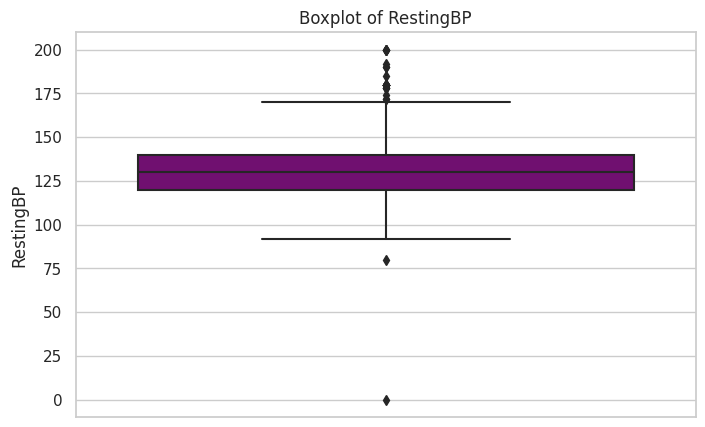

In [11]:
# 4. Boxplot for RestingBP
plt.figure(figsize=(8, 5))
sns.boxplot(y='RestingBP', data=df, color='purple')
plt.title('Boxplot of RestingBP')
plt.show()

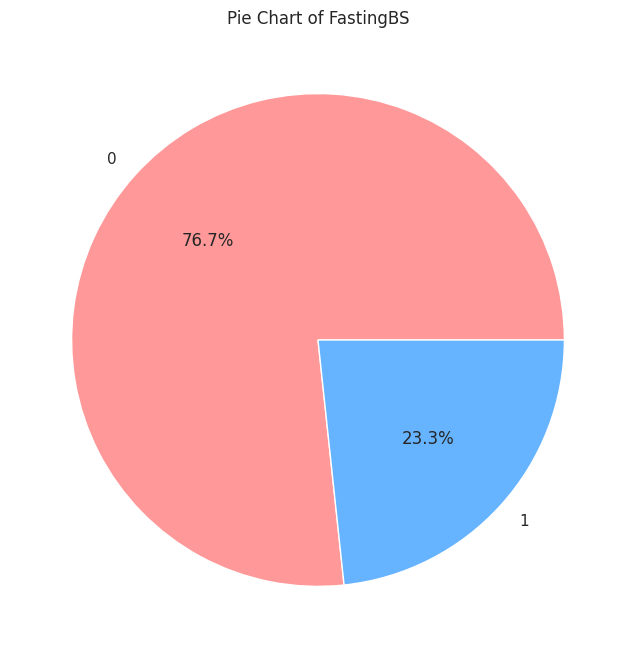

In [12]:
# 5. Pie Chart for FastingBS
fasting_counts = df['FastingBS'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(fasting_counts, labels=fasting_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Pie Chart of FastingBS')
plt.show()

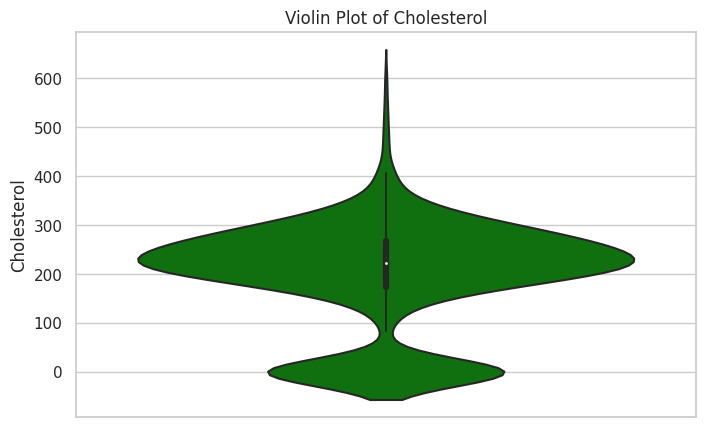

In [13]:
# 6. Violin Plot for Cholesterol
plt.figure(figsize=(8, 5))
sns.violinplot(y='Cholesterol', data=df, color='green')
plt.title('Violin Plot of Cholesterol')
plt.show()


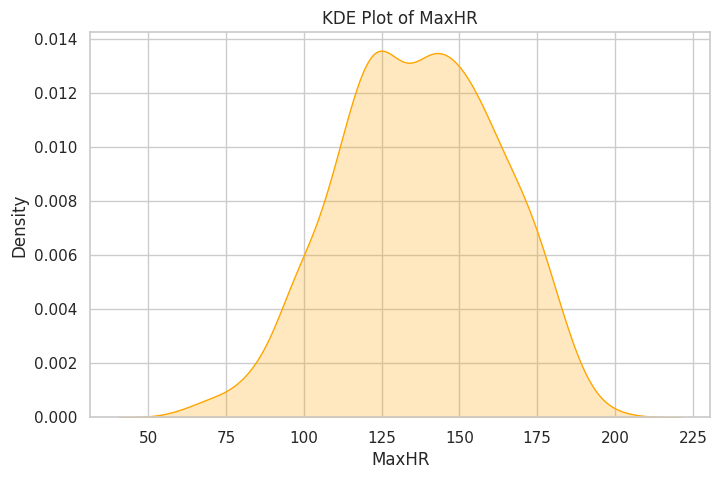

In [14]:
# 7. KDE Plot for MaxHR
plt.figure(figsize=(8, 5))
sns.kdeplot(df['MaxHR'], fill=True, color='orange')
plt.title('KDE Plot of MaxHR')
plt.show()

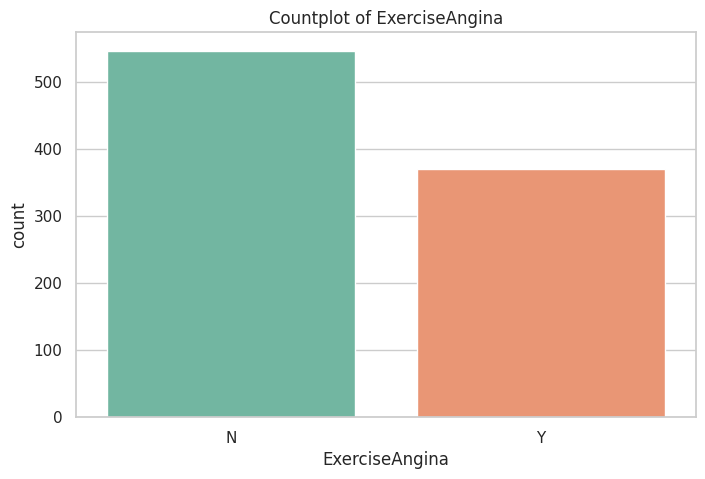

In [15]:
# 8. Countplot for ExerciseAngina
plt.figure(figsize=(8, 5))
sns.countplot(x='ExerciseAngina', data=df, palette='Set2')
plt.title('Countplot of ExerciseAngina')
plt.show()

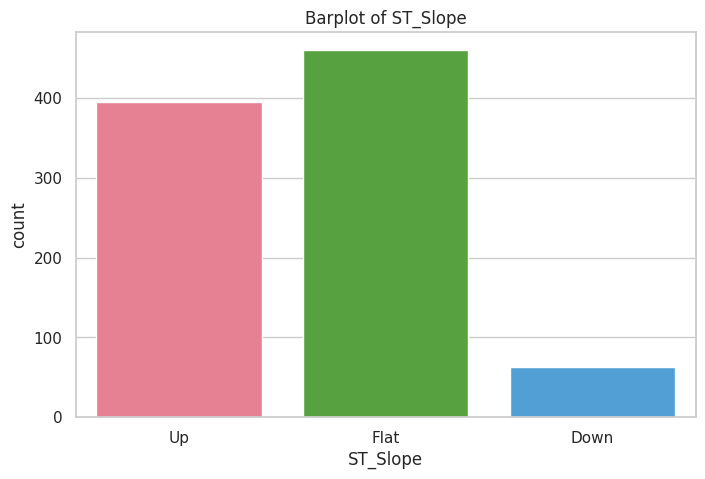

In [16]:
# 9. Barplot for ST_Slope
plt.figure(figsize=(8, 5))
sns.countplot(x='ST_Slope', data=df, palette='husl')
plt.title('Barplot of ST_Slope')
plt.show()

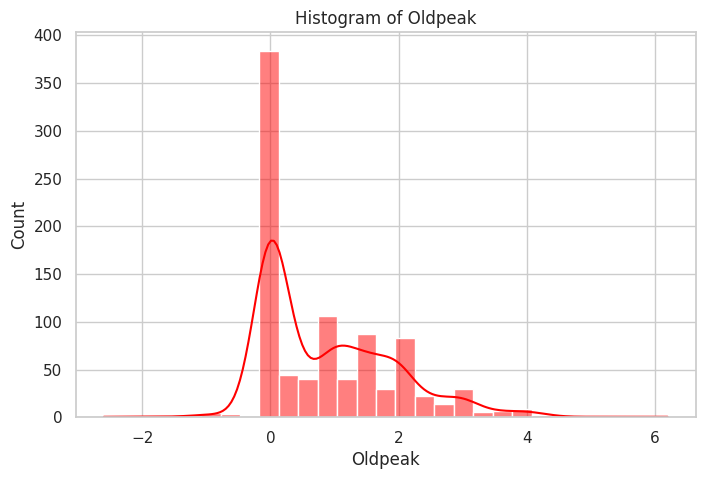

In [17]:
# 10. Histogram for Oldpeak
plt.figure(figsize=(8, 5))
sns.histplot(df['Oldpeak'], kde=True, color='red')
plt.title('Histogram of Oldpeak')
plt.show()

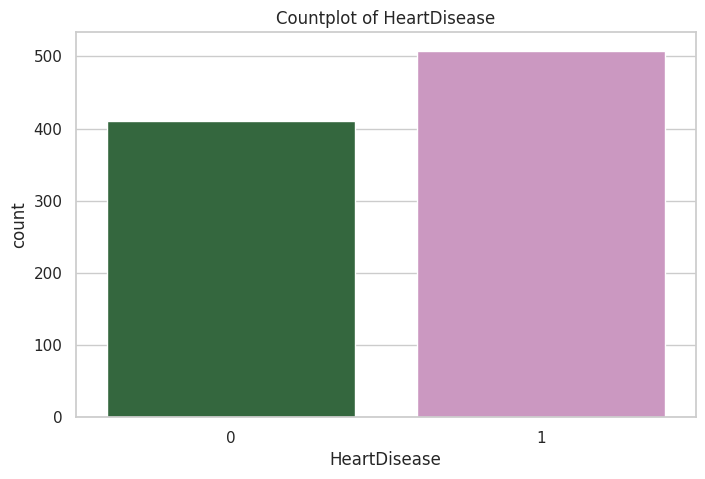

In [18]:
# 11. Countplot for HeartDisease
plt.figure(figsize=(8, 5))
sns.countplot(x='HeartDisease', data=df, palette='cubehelix')
plt.title('Countplot of HeartDisease')
plt.show()

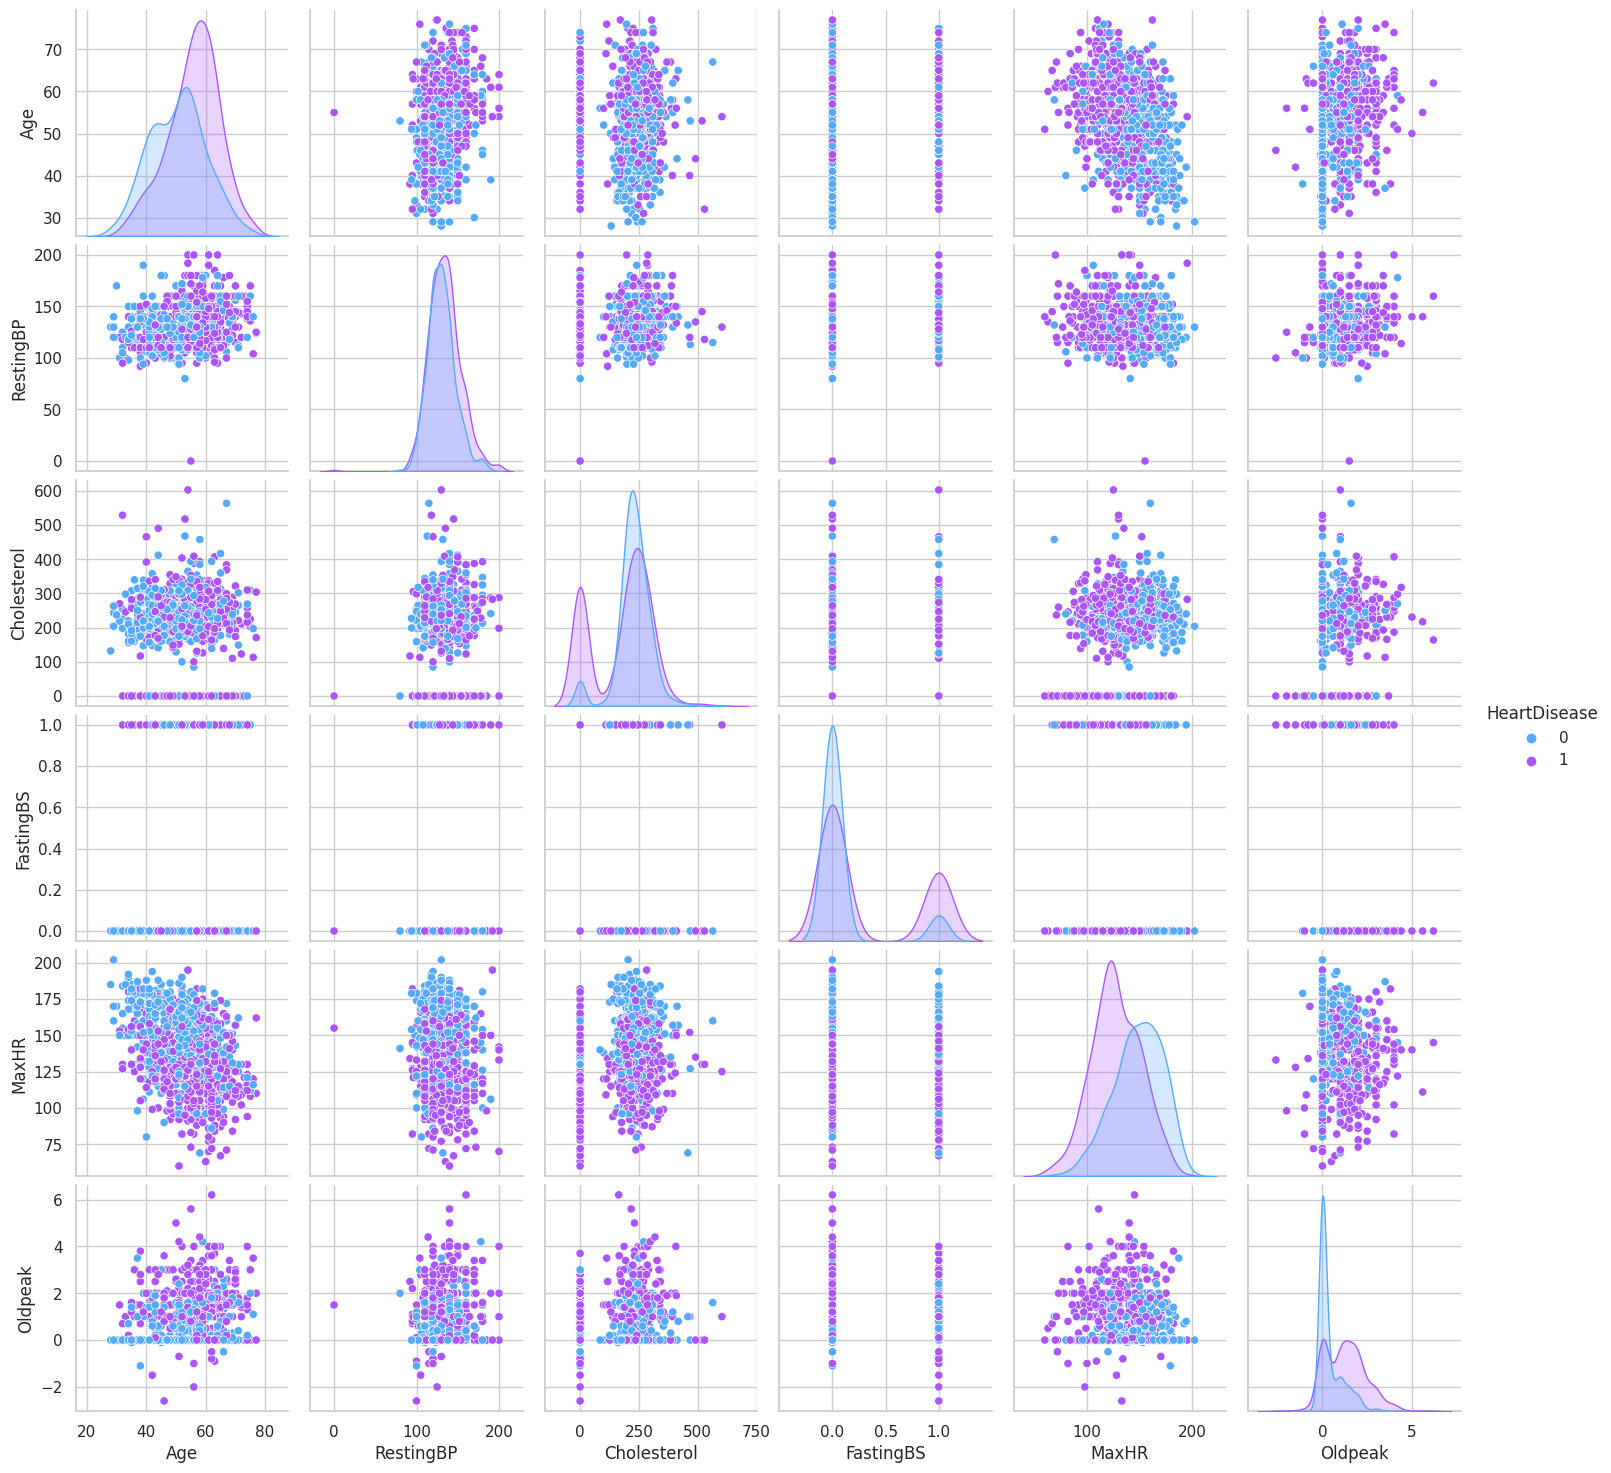

In [19]:
# 12. Pairplot to summarize all numeric columns
sns.pairplot(df, diag_kind="kde", hue="HeartDisease", palette='cool')
plt.show()

<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Multivariate analysis</h2>

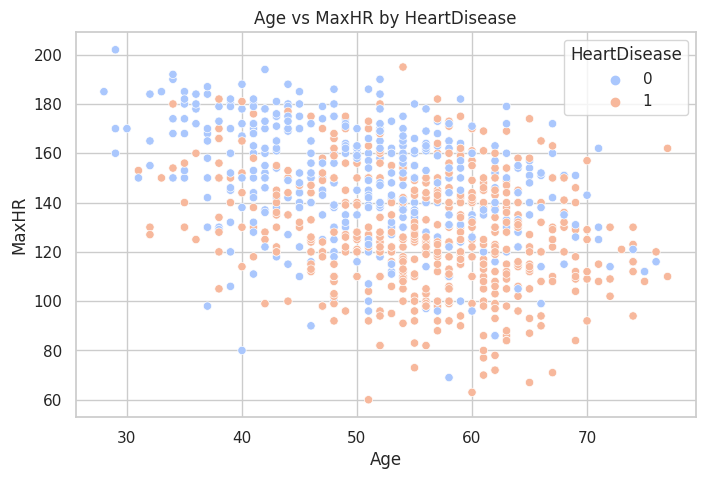

In [20]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='MaxHR', hue='HeartDisease', data=df, palette='coolwarm')
plt.title('Age vs MaxHR by HeartDisease')
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.show()

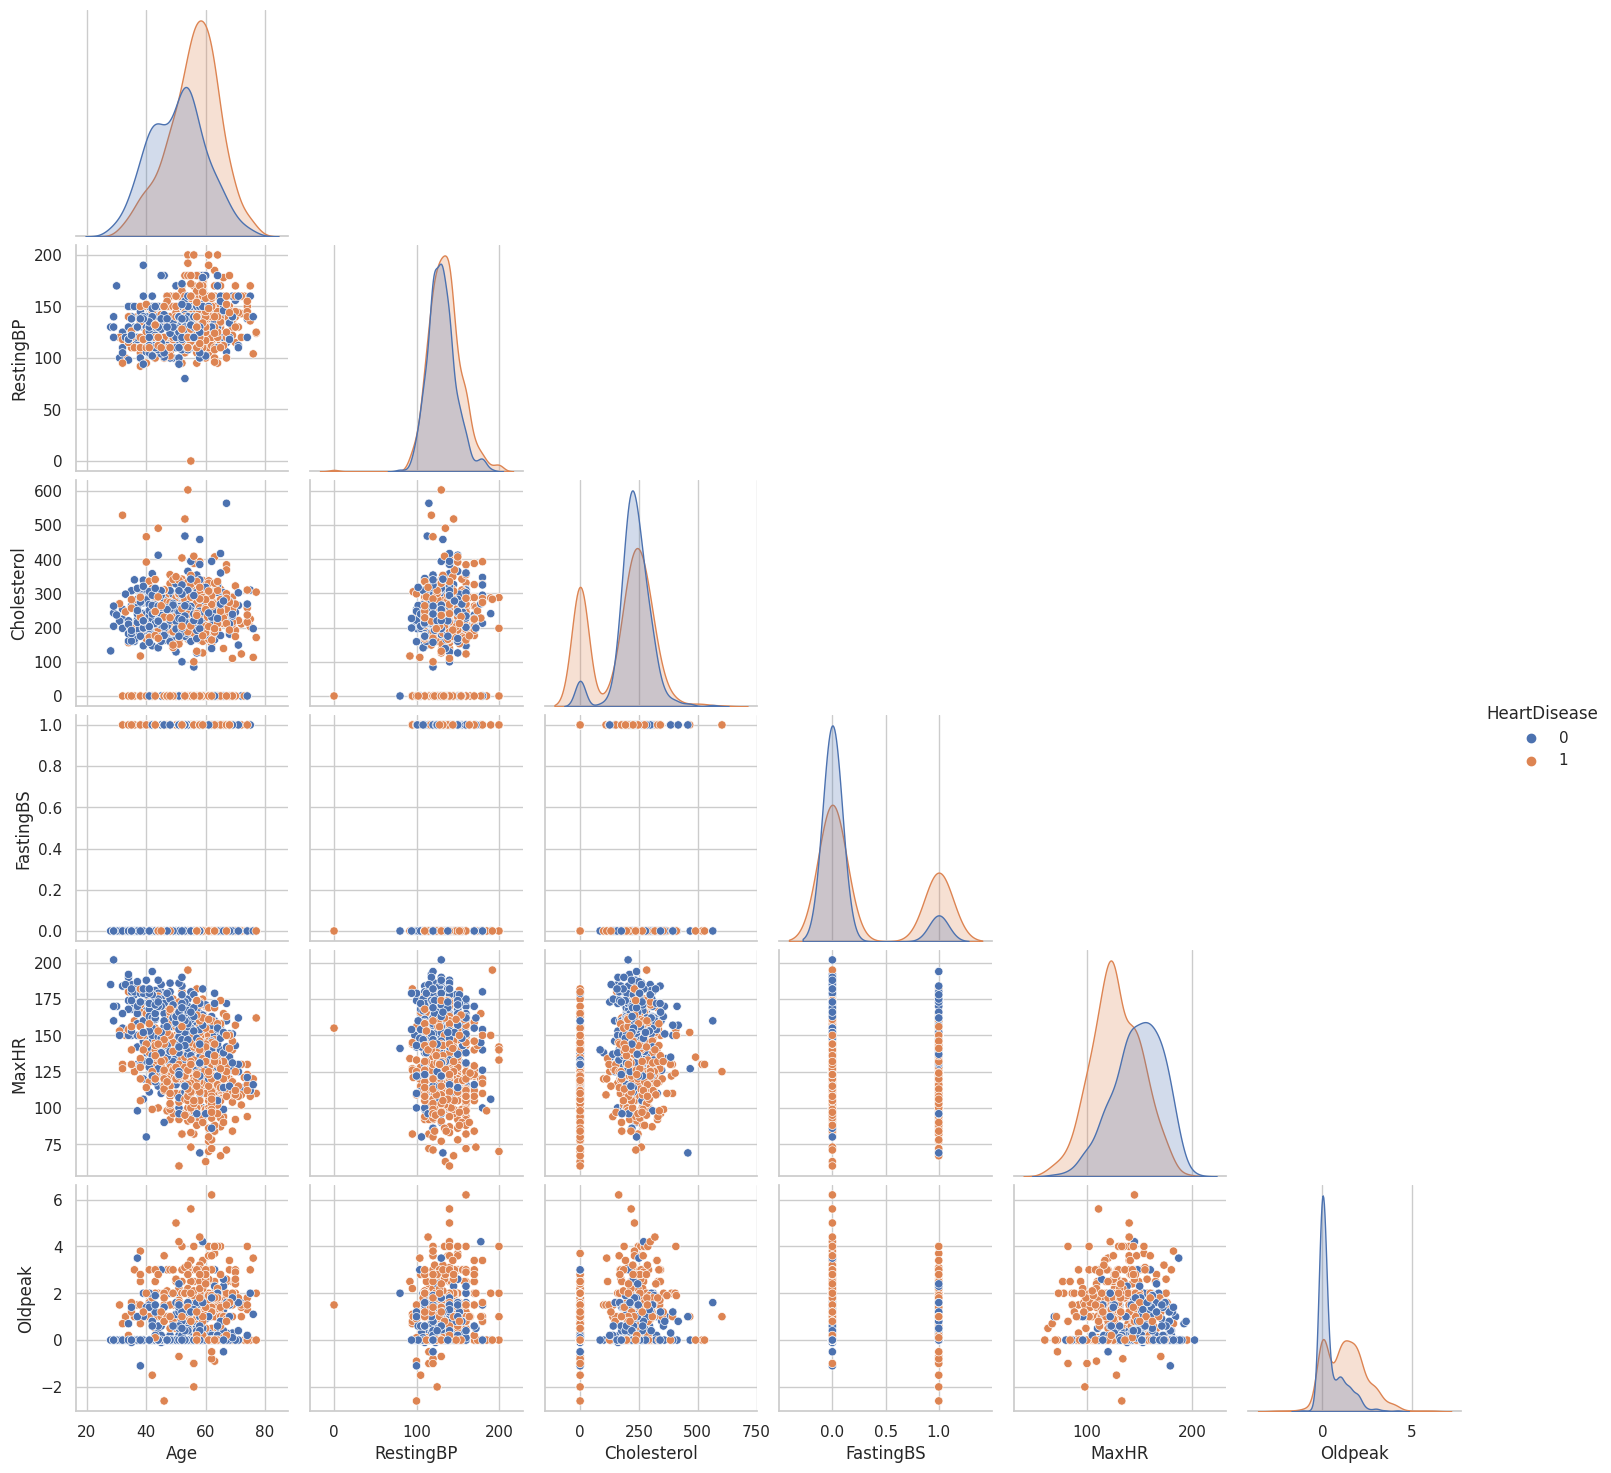

In [21]:
# 2. Pairplot for Numerical Features
sns.pairplot(df, hue="HeartDisease", diag_kind="kde", corner=True)
plt.show()

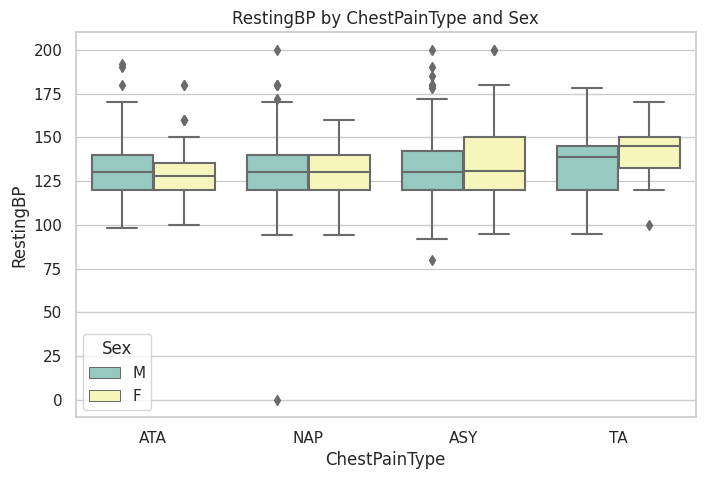

In [22]:
# 3. Boxplot: RestingBP vs ChestPainType
plt.figure(figsize=(8, 5))
sns.boxplot(x='ChestPainType', y='RestingBP', hue='Sex', data=df, palette='Set3')
plt.title('RestingBP by ChestPainType and Sex')
plt.show()

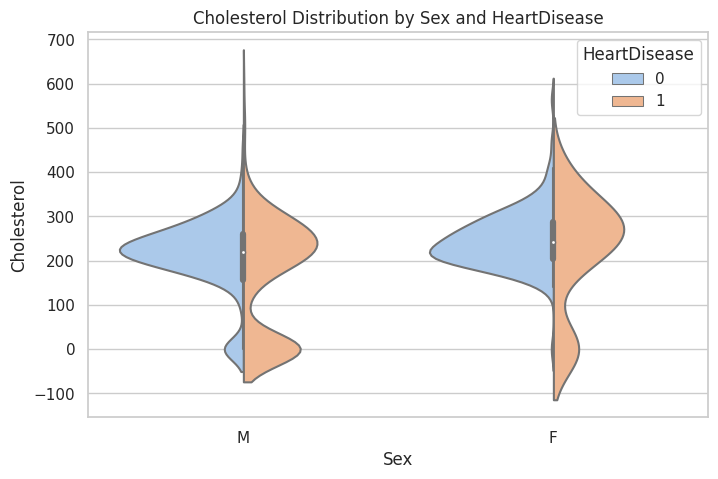

In [23]:
# 4. Violin Plot: Cholesterol vs Sex
plt.figure(figsize=(8, 5))
sns.violinplot(x='Sex', y='Cholesterol', hue='HeartDisease', data=df, split=True, palette='pastel')
plt.title('Cholesterol Distribution by Sex and HeartDisease')
plt.show()

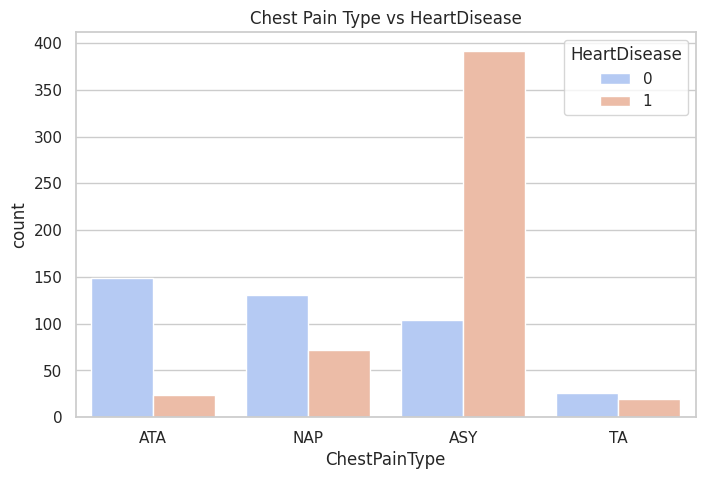

In [24]:
# 5. Countplot: ChestPainType vs HeartDisease
plt.figure(figsize=(8, 5))
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df, palette='coolwarm')
plt.title('Chest Pain Type vs HeartDisease')
plt.show()

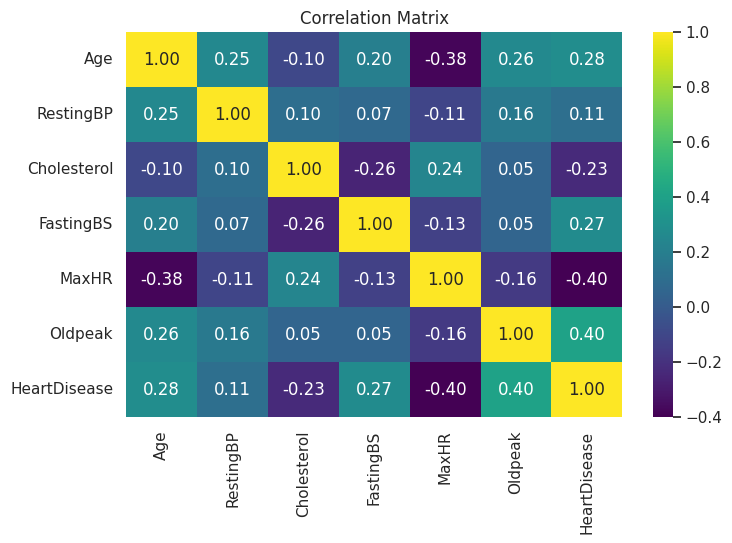

In [25]:
# 6. Heatmap: Correlation Between Numerical Features
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

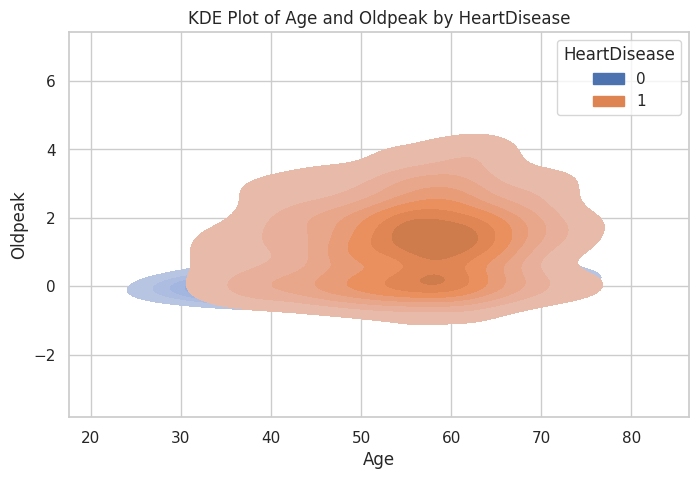

In [26]:
# 7. KDE Plot: Age and Oldpeak
plt.figure(figsize=(8, 5))
sns.kdeplot(x='Age', y='Oldpeak', hue='HeartDisease', data=df, cmap='coolwarm', fill=True)
plt.title('KDE Plot of Age and Oldpeak by HeartDisease')
plt.show()

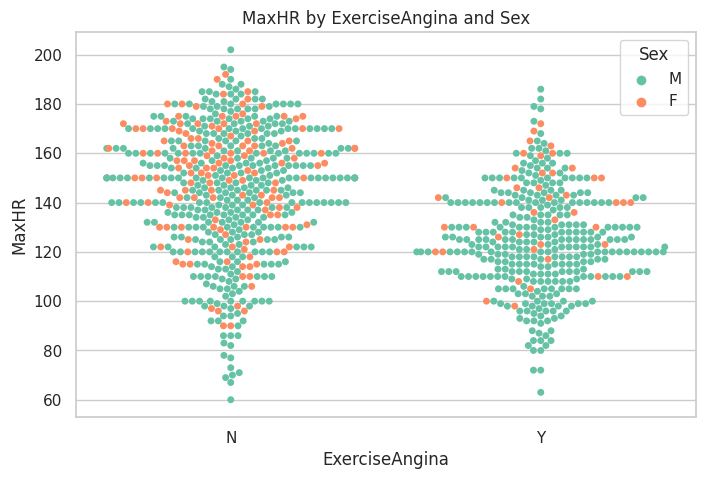

In [27]:
# 8. Swarmplot: MaxHR vs ExerciseAngina
plt.figure(figsize=(8, 5))
sns.swarmplot(x='ExerciseAngina', y='MaxHR', hue='Sex', data=df, palette='Set2')
plt.title('MaxHR by ExerciseAngina and Sex')
plt.show()

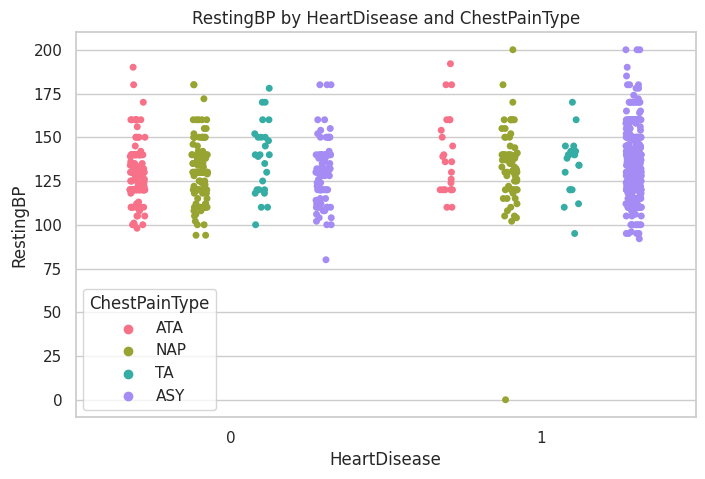

In [28]:
# 9. Stripplot: RestingBP vs HeartDisease
plt.figure(figsize=(8, 5))
sns.stripplot(x='HeartDisease', y='RestingBP', hue='ChestPainType', data=df, palette='husl', dodge=True)
plt.title('RestingBP by HeartDisease and ChestPainType')
plt.show()

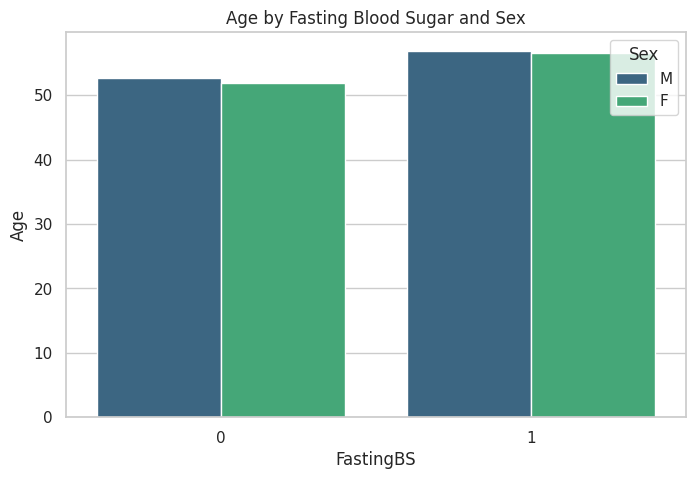

In [29]:
# 10. Barplot: Age vs FastingBS
plt.figure(figsize=(8, 5))
sns.barplot(x='FastingBS', y='Age', hue='Sex', data=df, ci=None, palette='viridis')
plt.title('Age by Fasting Blood Sugar and Sex')
plt.show()

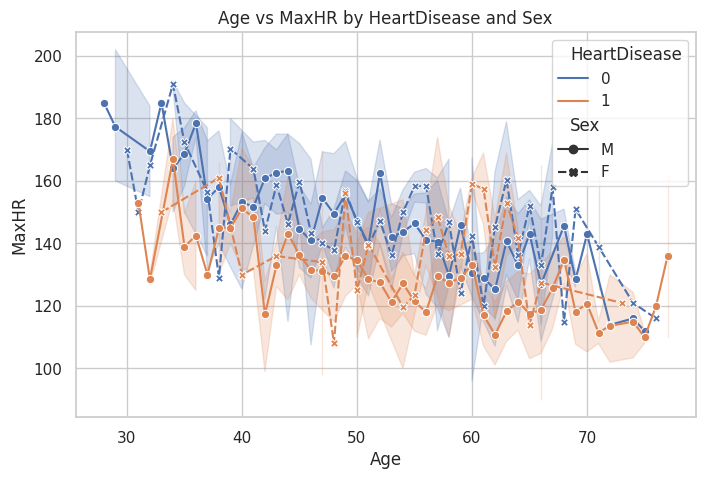

In [30]:
# 11. Lineplot: Age vs MaxHR
plt.figure(figsize=(8, 5))
sns.lineplot(x='Age', y='MaxHR', hue='HeartDisease', style='Sex', data=df, markers=True)
plt.title('Age vs MaxHR by HeartDisease and Sex')
plt.show()

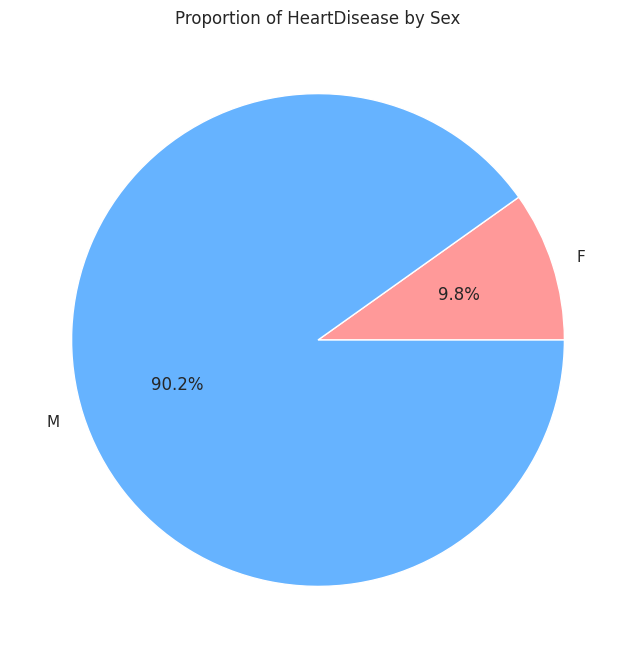

In [31]:
# 12. Pie Chart: Proportion of HeartDisease by Sex
heart_disease_sex = df.groupby('Sex')['HeartDisease'].sum()
plt.figure(figsize=(8, 8))
plt.pie(heart_disease_sex, labels=heart_disease_sex.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Proportion of HeartDisease by Sex')
plt.show()

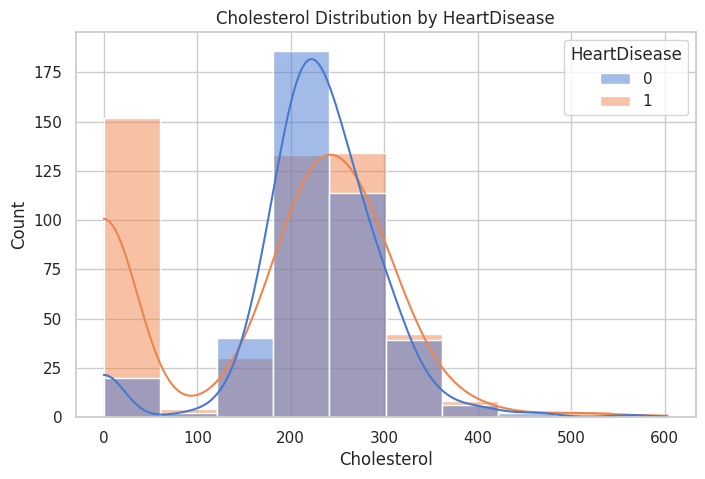

In [32]:
# 13. Histogram: Cholesterol by HeartDisease
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Cholesterol", hue="HeartDisease", kde=True, palette='muted', bins=10)
plt.title('Cholesterol Distribution by HeartDisease')
plt.show()

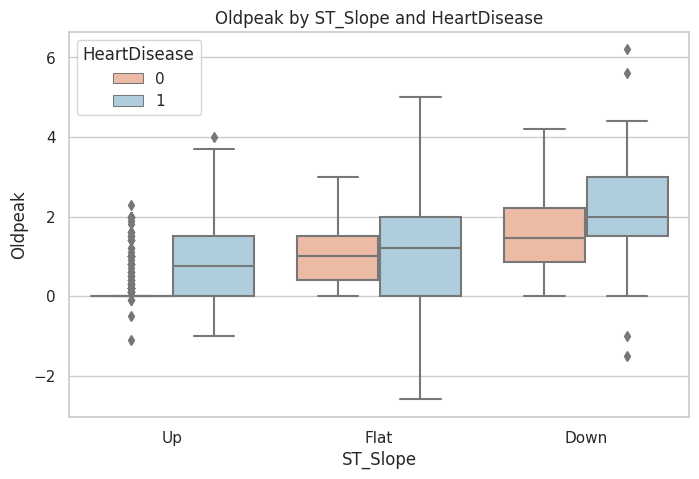

In [33]:
# 14. Boxplot: Oldpeak by ST_Slope
plt.figure(figsize=(8, 5))
sns.boxplot(x='ST_Slope', y='Oldpeak', hue='HeartDisease', data=df, palette='RdBu')
plt.title('Oldpeak by ST_Slope and HeartDisease')
plt.show()

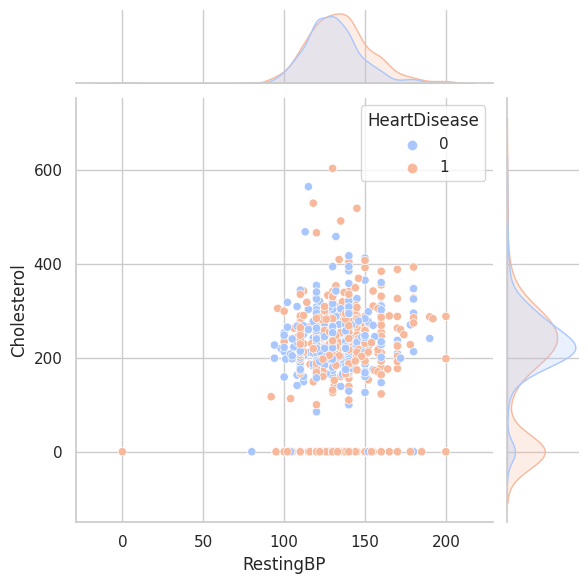

In [34]:

# 15. Jointplot: RestingBP vs Cholesterol
sns.jointplot(x='RestingBP', y='Cholesterol', hue='HeartDisease', kind='scatter', data=df, palette='coolwarm')
plt.show()


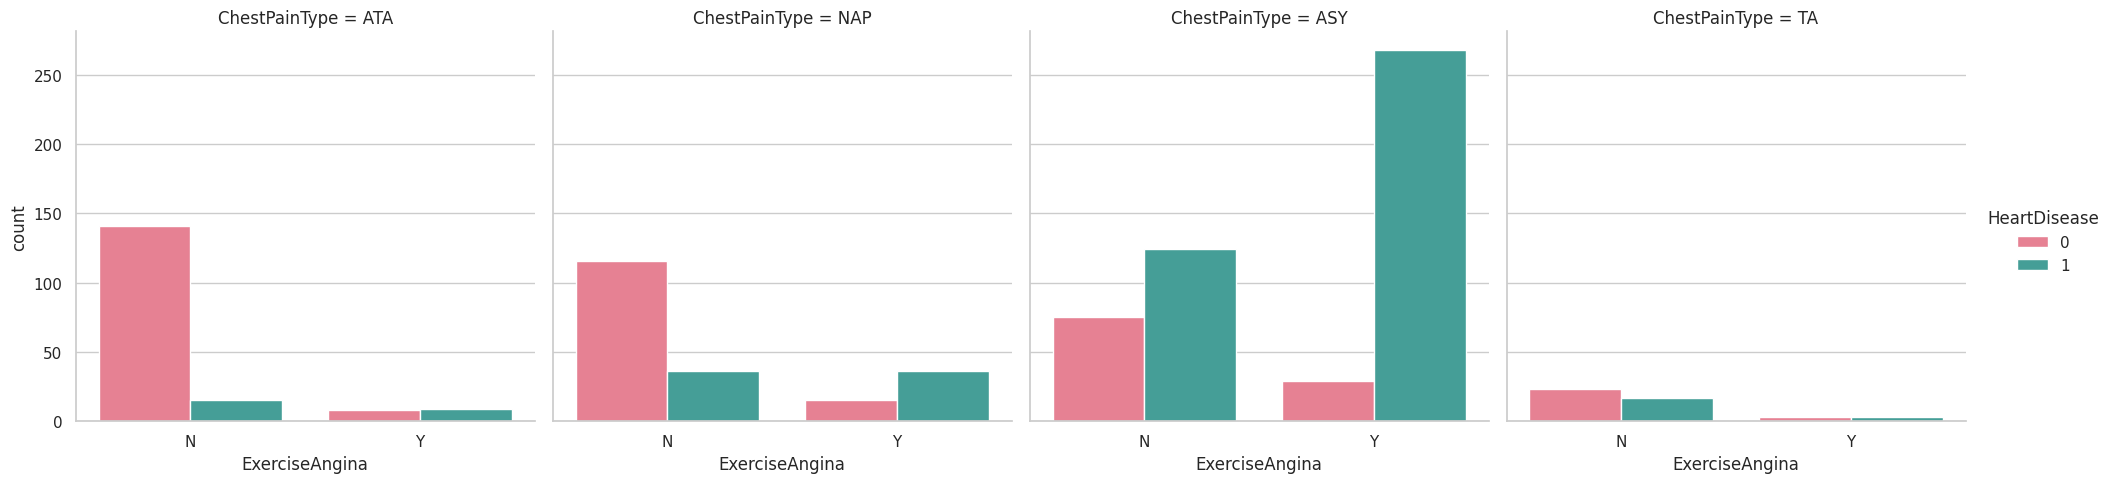

In [35]:
# 16. Catplot: ExerciseAngina vs ChestPainType
sns.catplot(x="ExerciseAngina", col="ChestPainType", hue="HeartDisease", kind="count", data=df, palette="husl")
plt.show()

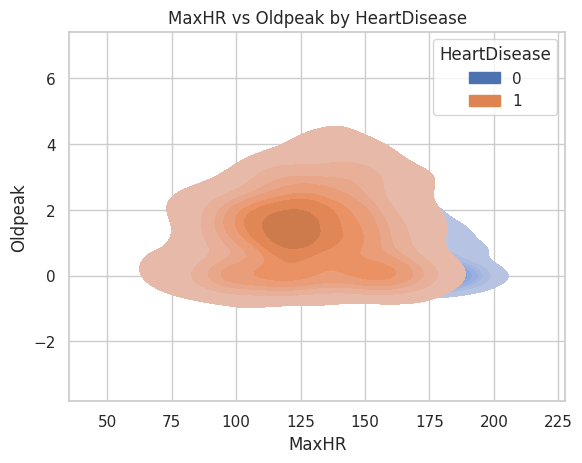

In [36]:
# 17. KDE 2D: MaxHR vs Oldpeak
sns.kdeplot(x='MaxHR', y='Oldpeak', hue='HeartDisease', data=df, cmap='coolwarm', fill=True)
plt.title('MaxHR vs Oldpeak by HeartDisease')
plt.show()

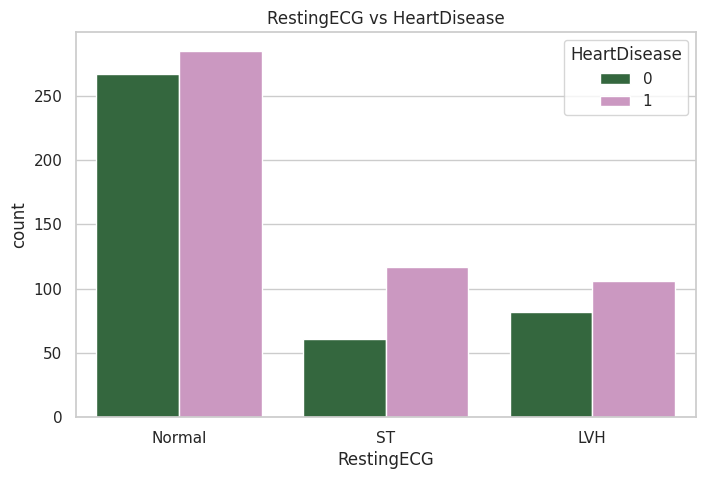

In [37]:
# 18. Countplot: RestingECG vs HeartDisease
plt.figure(figsize=(8, 5))
sns.countplot(x='RestingECG', hue='HeartDisease', data=df, palette='cubehelix')
plt.title('RestingECG vs HeartDisease')
plt.show()

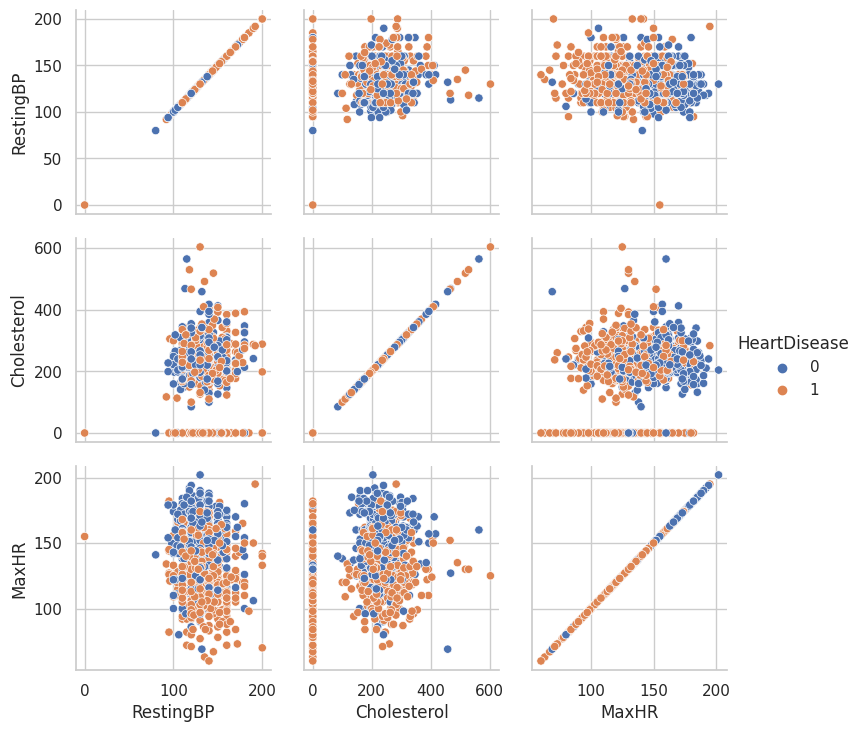

In [38]:
# 19. PairGrid: RestingBP, Cholesterol, MaxHR
g = sns.PairGrid(df, vars=["RestingBP", "Cholesterol", "MaxHR"], hue="HeartDisease")
g.map(sns.scatterplot)
g.add_legend()
plt.show()

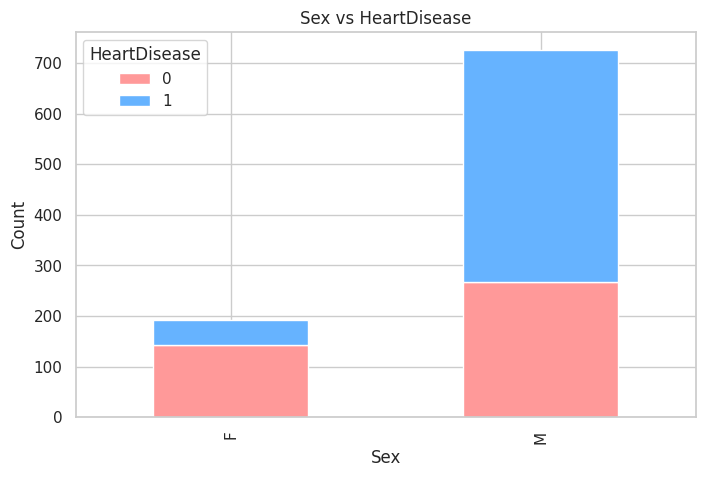

In [39]:
# 20. Stacked Bar Chart: Sex vs HeartDisease
sex_hd = df.groupby(['Sex', 'HeartDisease']).size().unstack()
sex_hd.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'], figsize=(8, 5))
plt.title('Sex vs HeartDisease')
plt.ylabel('Count')
plt.xlabel('Sex')
plt.show()

<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Data preprocessing</h2>

In [40]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Select columns with categorical data
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply label encoding to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the dataset after encoding
print(df.head())


   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0  


In [41]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Apply MinMaxScaler to numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the dataset after scaling
print(df.head())


        Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0  0.244898  1.0       0.333333       0.70     0.479270        0.0   
1  0.428571  0.0       0.666667       0.80     0.298507        0.0   
2  0.183673  1.0       0.333333       0.65     0.469320        0.0   
3  0.408163  0.0       0.000000       0.69     0.354892        0.0   
4  0.530612  1.0       0.666667       0.75     0.323383        0.0   

   RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0         0.5  0.788732             0.0  0.295455       1.0           0.0  
1         0.5  0.676056             0.0  0.409091       0.5           1.0  
2         1.0  0.267606             0.0  0.295455       1.0           0.0  
3         0.5  0.338028             1.0  0.465909       0.5           1.0  
4         0.5  0.436620             0.0  0.295455       1.0           0.0  


<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Define the classification model</h2>

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import (
    AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [43]:
# Split data into features and target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [44]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Step 3: Define Models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "MLP Classifier": MLPClassifier(max_iter=500),
    "Voting Classifier": VotingClassifier(
        estimators=[
            ('lr', LogisticRegression()),
            ('rf', RandomForestClassifier()),
            ('svc', SVC(probability=True))
        ],
        voting='soft'
    )
}

In [46]:
# Step 4: Train and Evaluate Models
results = []
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions and probabilities
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

     # Handle classification report dynamically
    precision, recall, f1_score = None, None, None
    if '1' in report:
        precision = report['1']['precision']
        recall = report['1']['recall']
        f1_score = report['1']['f1-score']
    elif '0' in report:  # Fallback if only class '0' exists
        precision = report['0']['precision']
        recall = report['0']['recall']
        f1_score = report['0']['f1-score']

         # Store results
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
        "ROC-AUC": roc_auc
    })
    # Confusion Matrix
    print(f"Confusion Matrix for {name}:\n", confusion)
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred))
     

Confusion Matrix for Logistic Regression:
 [[68  9]
 [19 88]]
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.78      0.88      0.83        77
         1.0       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Confusion Matrix for K-Nearest Neighbors:
 [[66 11]
 [15 92]]
Classification Report for K-Nearest Neighbors:
               precision    recall  f1-score   support

         0.0       0.81      0.86      0.84        77
         1.0       0.89      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Confusion Matrix for Support Vector Classifier:
 [[64 13]
 [14 93]]
Classification Report for Support Vector Classifier:
     

In [47]:
# Step 5: Compare Models
results_df = pd.DataFrame(results)
print("\nComparison of Models:")
print(results_df)


Comparison of Models:
                              Model  Accuracy Precision Recall F1-Score  \
0               Logistic Regression  0.847826      None   None     None   
1               K-Nearest Neighbors  0.858696      None   None     None   
2         Support Vector Classifier  0.853261      None   None     None   
3                     Decision Tree  0.809783      None   None     None   
4                     Random Forest  0.885870      None   None     None   
5                 Gradient Boosting  0.875000      None   None     None   
6                       Naive Bayes  0.842391      None   None     None   
7                          AdaBoost  0.853261      None   None     None   
8                           Bagging  0.875000      None   None     None   
9                       Extra Trees  0.858696      None   None     None   
10                          XGBoost  0.869565      None   None     None   
11     Linear Discriminant Analysis  0.836957      None   None     None   
12

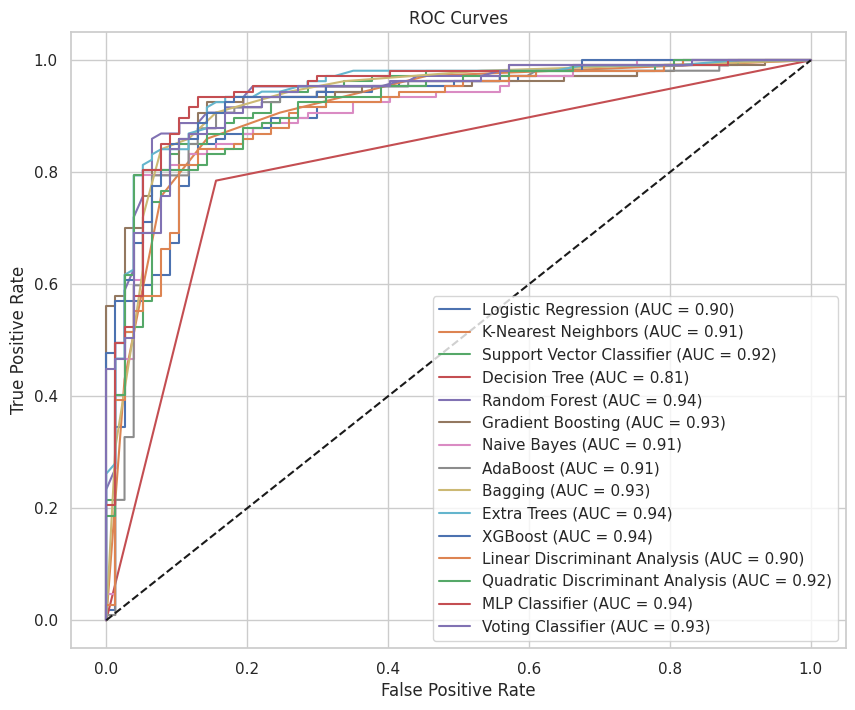

In [48]:
# Step 6: Plot ROC Curves
plt.figure(figsize=(10, 8))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

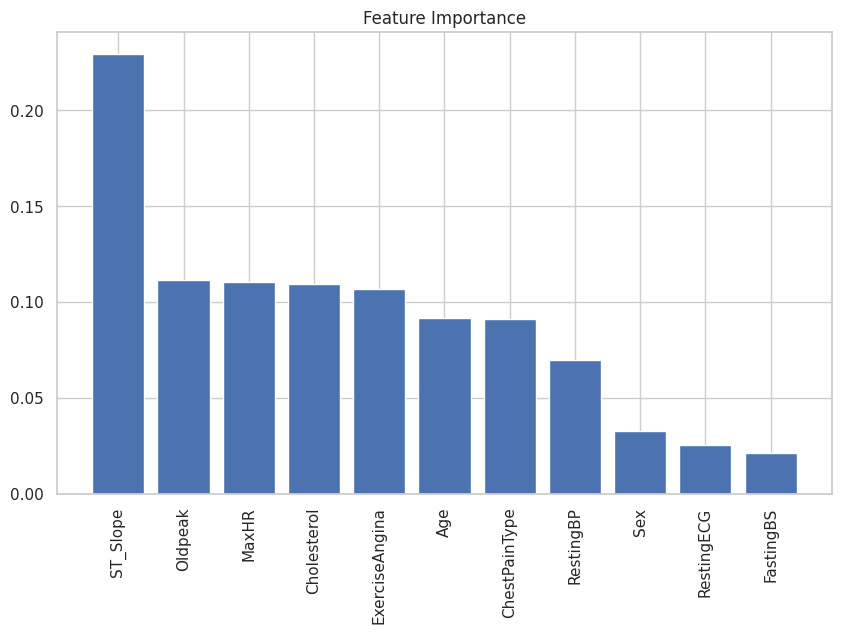

In [49]:
# Step 7: Feature Importance Plot for Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.title("Feature Importance")
plt.show()

<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Thanks for visiting my notebook . Please provide the upvote and comment</h2>